In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram, array_to_latex
import matplotlib.pyplot as plt
import numpy as np

Główną częścią obwodu kwantowego, która odpowiada za to, co dzieje się z kubitami będą bramki kwantowe.  
Bramki można reprezentować w różny sposób.  
Po pierwsze - jako macierz unitarną.  
Po drugie - określając ich działanie na wektory bazowe.  
Po trzecie - na sferze Blocha
---

Na przykład - dla bramki X:  

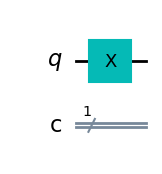

In [2]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
%matplotlib inline
circuit.draw(output='mpl')

Reprezentacja macierzowa wygląda następująco: $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $

In [3]:
# Macierz
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


Działanie bramki X na wektory bazy standardowej: $\begin{cases}
    X \vert 0 \rangle = \vert 1 \rangle \\
    X \vert 1 \rangle = \vert 0 \rangle 
\end{cases}$

In [4]:
# Bramka X w działaniu na wektory bazowe
circuit = QuantumCircuit(1,1)
initial_state = Statevector.from_instruction(circuit) 

circuit.x(0)
final_state = Statevector.from_instruction(circuit) 

print(f"initial state: {initial_state}")
print(f"final state: {final_state}")

initial state: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
final state: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


Reprezentacja działania na sferze Blocha:

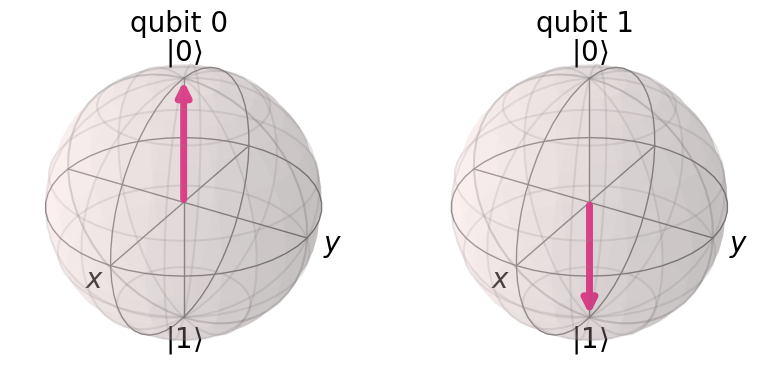

In [5]:
# Jako obrót na sferze Blocha (przejście od stanu |0> do |1>)

# Tworzymy obwód z dwoma kubitami
qc = QuantumCircuit(2)

# Pierwszy kubit zostawiamy nieruszony (jako referencję), na drugi kubit działamy bramką X
qc.x(1) 
qc.draw()

# Rysujemy stan każdego z kubitów na sferze Blocha
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

### Bramki X, Y, Z
W Qiskit wbudowane jest wiele standardowych bramek, na przykład:
- bramki X, Y, Z (macierze Pauliego),
- bramka Hadamarda,
- bramka fazowa S,
- bramka CNOT, CZ,
- bramka SWAP,
- bramka Toffoli`ego

Na pierwszym obwodzie zobaczymy wizualizację różnych bramek jednokubitowych.

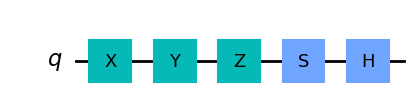

In [6]:
circuit = QuantumCircuit(1)
circuit.x(0)     # bramka X
circuit.y(0)     # bramka Y
circuit.z(0)     # bramka Z
circuit.s(0)     # bramka fazowa (S)
circuit.h(0)     # bramka Hadamarda

circuit.draw(output="mpl")

Istnieją też bramki, których działanie jest określone na więcej niż jednym kubicie. Przykłady bramek dwukubitowych są przedstawione na obwodzie poniżej:
    

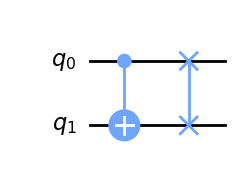

In [7]:
circuit = QuantumCircuit(2)
circuit.cx(0,1)      # bramka CNOT
circuit.swap(0,1)    # bramka SWAP

circuit.draw(output="mpl")

Do demonstracji bramki Toffoliego (`CCXGate`) potrzebujemy obwodu z trzema kubitami:

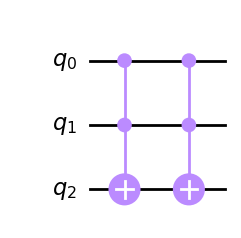

In [8]:
circuit = QuantumCircuit(3)
circuit.toffoli(0,1,target_qubit=2)     # bramka Toffoliego - pierwsze dwa argumenty to kubity kontrolne,
                                        # trzeci argument to "target qubit"

circuit.ccx(0,1,2)                      # alternatywna równoważna definicja bramki Toffoliego (CCX)
                                       
circuit.draw(output="mpl")

**Ćwiczenia**
1. Przygotować układ składający się z jednego kubita w stanie początkowym $\vert 0 \rangle$. Przeprowadzić (tj. stworzyć obwód, który przeprowadzi) ten kubit w superpozycję stanów bazowych $\frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)$.
2. Przygotować układ składający się z jednego kubita w stanie początkowym $\vert 0 \rangle$. Przeprowadzić ten kubit w stan $\frac{1}{\sqrt{2}}(\vert 0 \rangle - \vert 1 \rangle)$.
3. Przygotować układ składający się z dwóch kubitów w stanie $\vert 00 \rangle$. Przeprowadzić ten układ w superpozycję wszystkich możliwych stanów bazowych dwukubitowych z równym prawdopodobieństwem, tj. $\frac{1}{2}(\vert 00 \rangle + \vert 01 \rangle + \vert 10 \rangle + \vert 11 \rangle)$.  
4. Przygotować układ składający się z dwóch kubitów w stanie $\vert 00 \rangle$. Przeprowadzić ten układ w stan $\frac{1}{\sqrt{2}}(\vert 01 \rangle + \vert 11 \rangle)$.  
5. Przygotować układ składający się z dwóch kubitów w stanie $\vert 00 \rangle$. Przeprowadzić ten układ w stan splątany $\frac{1}{\sqrt{2}}(\vert 01 \rangle + \vert 10 \rangle)$. 
6. Przygotować układ składający się z trzech kubitów w stanie $\vert 000 \rangle$. Przeprowadzić ten układ w stan $\frac{1}{\sqrt{2}}(\vert 001 \rangle +\vert 011 \rangle)$.  
7. Przygotować układ trzech kubitów w stanie początkowym $ \vert 000 \rangle $. Przeprowadzić ten stan początkowy w stan $\frac{1}{2}(\vert 100 \rangle +\vert 101 \rangle + \vert 110 \rangle + \vert 111 \rangle)$.  
8. Przygotować układ trzech kubitów w stanie początkowym $\vert 000 \rangle$. Przeprowadzić ten stan początkowy w stan $\frac{1}{2}(\vert 000 \rangle + \vert 001 \rangle + \vert 110 \rangle + \vert 111 \rangle)$.  
9. Przygotować układ dwóch kubitów w stanie $\vert 00 \rangle + \vert 11 \rangle$. Przeprowadzić ten stan początkowy w stan $\vert 00 \rangle$.
10. Przygotować układ trzech kubitów w stanie $\vert 000 \rangle + \vert 111 \rangle$. Przeprowadzić ten stan początkowy w stan $\vert 010 \rangle$.

Do wykonania ćwiczenia można wykorzystać poniższy schemat. Najpierw należy określić jakiego wektora szukamy. Następnie należy dostosować obwód, czyli najpierw ustalić liczbę kubitów, a w końcu uzupełnić obwód odpowiednimi bramkami, tak żeby produkował żądany stan.

In [9]:
# STANY JEDNOKUBITOWE
state_0 = np.array([1,0])        # |0>
state_1 = np.array([0,1])        # |1>

# STANY DWUKUBITOWE
state_00 = np.array([1,0,0,0])   # |00>
state_01 = np.array([0,1,0,0])   # |01>
state_10 = np.array([0,0,1,0])   # |10>
state_11 = np.array([0,0,0,1])   # |11>

# STANY TRZYKUBITOWE
#state_000 = np.array([1,0,0,0,0,0,0,0])   # |000>    etc...

target_state = 1/np.sqrt(2)*(state_0 + state_1)
array_to_latex(target_state)

<IPython.core.display.Latex object>

In [10]:
qc = QuantumCircuit(1)

# Tutaj miejsce na uzupełnienie bramek kwantowych.



# -------------------------

final_state = Statevector.from_instruction(qc) 
array_to_latex(final_state)

<IPython.core.display.Latex object>

Można też wyświetlić spodziewane pomiary (prawdopodobieństwa zmierzenia |00>, |01>, |10>, |11>. Szukamy takiego stanu, aby prawdopodobieństwo zmierzenia danego stanu bazowego było kwadratem współczynnika, który stoi przy danym stanie bazowym. Na przykład dla stanu $\frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)$ powinniśmy uzyskać w wyniku pomiaru każdy ze stanów $\vert 0 \rangle$ oraz $\vert 1 \rangle$ z prawdopodobieństwem około $\frac{1}{2}$.  

**Ważne!** Ze strony Qiskit: "When displaying or interpreting a list of bits (or qubits) as a string, bit $n$ is the leftmost bit, and bit $0$ is the rightmost bit." Czyli - kiedy jest więcej kubitów etykietki na histogramie mają odwrotną kolejność bitów względem tego jak zapisujemy w kecie, tzn. etykietka "abc" oznacza stan $\vert cba \rangle$. 

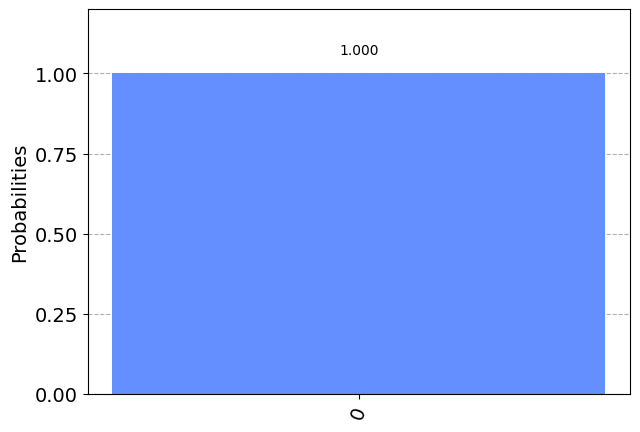

In [11]:
qc.measure_all()

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts())